In [41]:

# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set plot style
sns.set(style="whitegrid")

# Load Dataset
df = pd.read_csv("owid-covid-data.csv")

# Preview Dataset
print("\n--- Columns ---\n", df.columns)
display(df.head())

# Check Missing Values
missing = df.isnull().sum().sort_values(ascending=False).head(10)
print("\n--- Top 10 Missing Columns ---\n", missing)


--- Columns ---
 Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_sm

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN



--- Top 10 Missing Columns ---
 weekly_icu_admissions_per_million          160893
weekly_icu_admissions                      160893
excess_mortality_cumulative_per_million    160630
excess_mortality                           160630
excess_mortality_cumulative                160630
excess_mortality_cumulative_absolute       160630
weekly_hosp_admissions_per_million         155403
weekly_hosp_admissions                     155403
total_boosters                             148787
total_boosters_per_hundred                 148787
dtype: int64


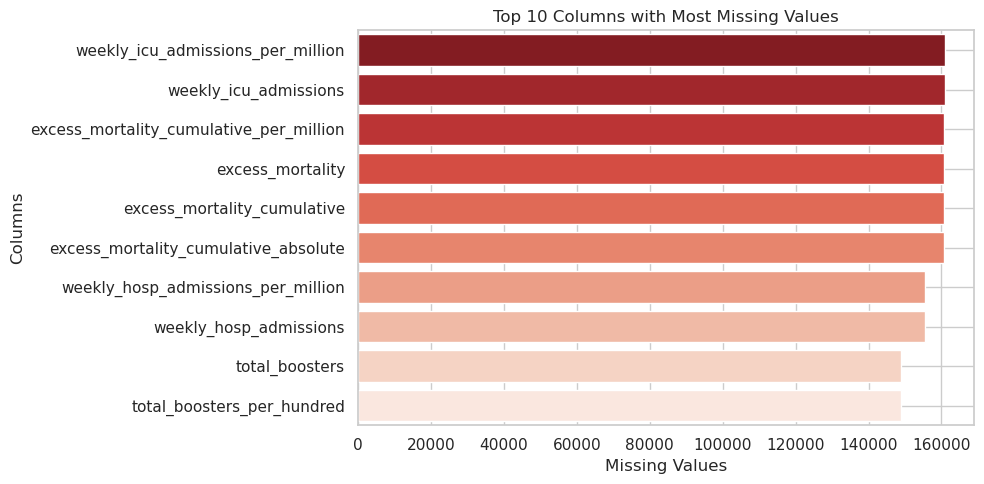

In [31]:
# Plot missing data as a bar chart
plt.figure(figsize=(10,5))
sns.barplot(x=missing.values, y=missing.index, palette="Reds_r")
plt.title("Top 10 Columns with Most Missing Values")
plt.xlabel("Missing Values")
plt.ylabel("Columns")
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

In [33]:

# Filter Countries of Interest
countries = ['Kenya', 'United States', 'India']
df_countries = df[df['location'].isin(countries)]

# Drop Rows with Missing Critical Values
df_countries = df_countries.dropna(subset=['date', 'total_cases', 'total_deaths'])

# Handle Remaining Missing Values
df_countries.fillna(method='ffill', inplace=True)


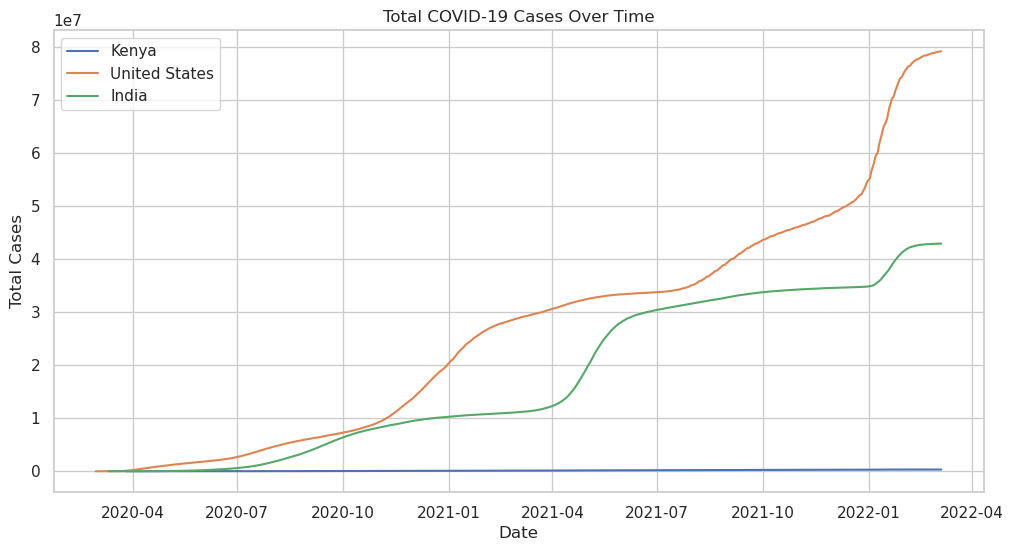

In [34]:
# Total Cases Over Time
plt.figure(figsize=(12,6))
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.show()

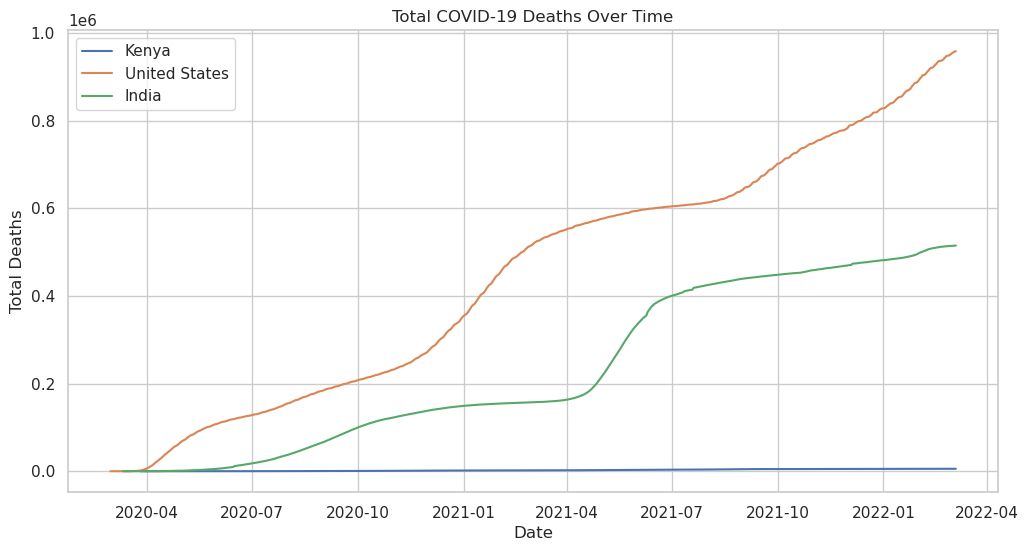

In [35]:

# Total Deaths Over Time
plt.figure(figsize=(12,6))
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.show()


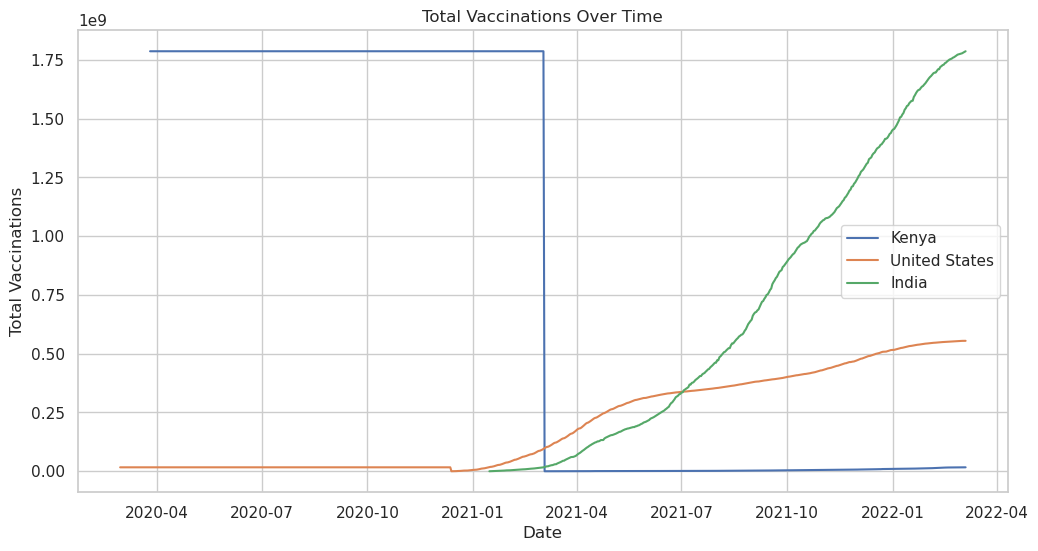

In [36]:
# Vaccination Progress Over Time
plt.figure(figsize=(12,6))
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)
plt.title('Total Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
 latest = df[df['date'] == df['date'].max()]
fig = px.choropleth(latest,
                    locations="iso_code",
                    color="total_cases",
                    hover_name="location",
                    title="Total COVID-19 Cases by Country (Latest)",
                    color_continuous_scale="Reds")

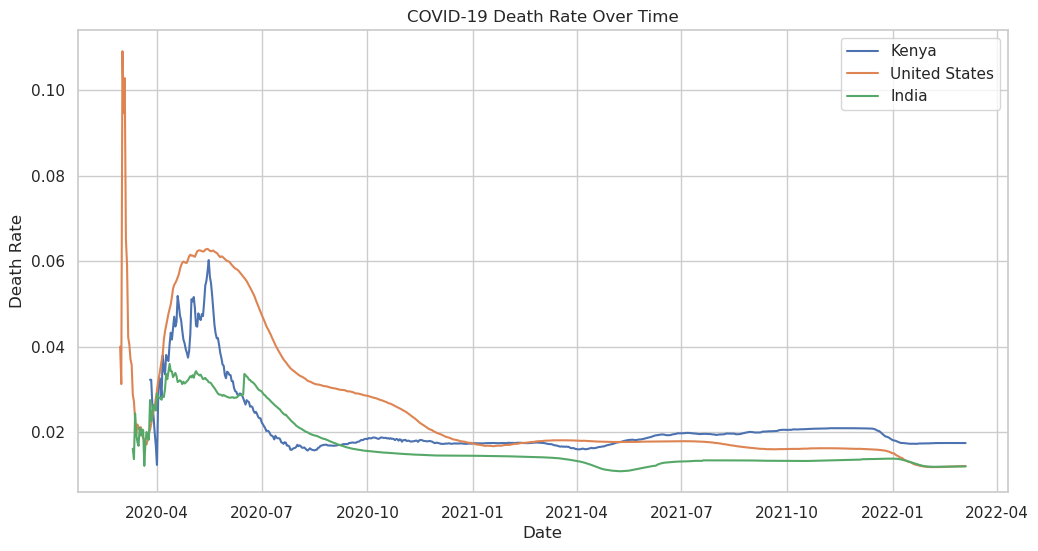

In [40]:
plt.figure(figsize=(12,6))
for country in countries:
    subset = df_countries[df_countries['location'] == country].copy()
    subset['death_rate'] = subset['total_deaths'] / subset['total_cases']
    plt.plot(subset['date'], subset['death_rate'], label=country)
plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
 Key Insights (add in Markdown cells):
 - India shows a sharp increase in cases mid-2021
 - USA had high vaccination early compared to Kenya
 - Death rates vary, possibly due to healthcare capacity, testing, or variant waves 